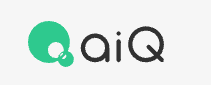

[disclaimer](./disclaimer.txt/)

# Load FACTSET Consensus Estimate data.
This sample show how to achieve the following operation with a simple interface

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database

In [1]:
from aiq_strategy_robot.data.data_accessor import DAL
from aiq_strategy_robot.data.FACTSET.load_factset_fundamental_estimates import load_factset_fundamental_estimates

In [3]:
handler = DAL()
data_source='FACTSET'

### Pattern 1: look up FACTSET from symbols, package and freq.

#### Find out factset symbols from tickers

In [4]:
handler.load(
    data_source,
    data_type="symbol_lookup",
    ticker=["GOOG-US", 'MSFT-US'],
    exchange_code="NAS",
    pick_only_primary=True
).retrieve().head()

,FSYM_ID,FSYM_SECURITY_ID,FACTSET_ENTITY_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,FIGI,BBG_TICKER
0,WFJYTJ-R,DC1QVX-S,0FPWZZ-E,GOOG-US,Alphabet Inc. Class C,NAS,USD,BBG009S3NB30,GOOG US
2,P8R3C2-R,DF3K29-S,000Q07-E,MSFT-US,Microsoft Corporation,NAS,USD,BBG000BPH459,MSFT US


### `load_factset_fundamental_estimates`  
loading FACTSET consensus estimates 

In [5]:
handler = load_factset_fundamental_estimates(handler,                        
                                    symbols=["WFJYTJ-R","P8R3C2-R"],
                                    package="BASIC",
                                    freq=3)

handler.retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,CFPS,USD,10,1.346150,1.34615,2,1.252972,1.439328,0.131773,1,1,2020-08-24,2020-10-08,2022-07-18,2022-12-31
1,WFJYTJ-R,EPS,USD,3,0.662140,0.66800,35,0.398000,0.837500,0.085550,19,11,2020-07-09,2020-07-09,2022-07-18,2020-12-31
2,WFJYTJ-R,EPS,USD,1,1.268045,1.28000,39,0.538000,1.543500,0.150257,0,20,2022-07-22,2022-07-24,2022-07-18,2022-06-30
3,WFJYTJ-R,EPS,USD,5,1.473475,1.44000,22,1.180000,1.760000,0.130835,1,18,2022-12-07,2022-12-18,2022-07-18,2023-12-31
4,WFJYTJ-R,SALES,USD,4,83069.725520,83549.00000,29,79400.200000,86878.000000,1898.487221,4,16,2023-03-17,2023-03-18,2022-07-18,2023-12-31


### Data Access handler load
Load the data to memory

same return as **load_factset_fundamental_estimates**
```
sdh = load_factset_fundamental_estimates(handler,                        
                                    symbols="WFJYTJ-R",
                                    package="BASIC",
                                    freq=3)

```

In [6]:
handler.load(
    data_source,
    data_type="fundamental_estimates",
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,EPS,USD,8,1.683304,1.682600,3,1.648440,1.718871,0.035221,1,1,2023-07-07,2023-07-09,2022-07-18,2025-03-31
1,WFJYTJ-R,SALES,USD,2,48083.551800,48319.792000,20,44267.800000,49713.200000,1376.221845,12,0,2020-11-18,2020-11-19,2022-07-18,2021-03-31
2,WFJYTJ-R,CFPS,USD,4,0.666592,0.649205,3,0.647685,0.702885,0.031440,0,0,2017-01-16,2017-01-23,2022-07-18,2017-09-30
3,WFJYTJ-R,SALES,USD,1,5229.860323,5222.390000,31,4951.530000,5437.140000,104.680935,8,10,2010-07-19,2010-07-31,2022-07-18,2010-09-30
4,WFJYTJ-R,SALES,USD,1,5234.157097,5235.000000,31,5061.000000,5437.140000,89.442690,9,7,2010-09-21,2010-09-21,2022-07-18,2010-09-30


#### Narrow down output by specifying optional parameters
- `fields`: shrink by fundamental item names
- `start_datetime` and `end_datetime`: shrink by fundamental data releases

#### Specifying releases

In [7]:
# Get 'sales' and 'EPS' items only.
load_factset_fundamental_estimates(handler,  
    symbols="WFJYTJ-R",
    fields=["SALES", "EPS"],
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,EPS,USD,3,1.703039,1.71000,43,1.3300,1.86,0.086434,19,5,2024-04-08,2024-04-08,2022-07-18,2024-09-30
1,WFJYTJ-R,EPS,USD,7,1.853801,1.79500,14,1.5788,2.56,0.263589,3,1,2023-07-13,2023-07-16,2022-07-18,2024-12-31
2,WFJYTJ-R,EPS,USD,6,1.615468,1.60765,14,1.3303,2.36,0.249567,3,1,2023-07-13,2023-07-16,2022-07-18,2024-09-30
3,WFJYTJ-R,SALES,USD,4,75525.824325,75691.50000,24,72585.5000,80859.00,1760.683571,1,8,2023-01-19,2023-01-19,2022-07-18,2023-09-30
4,WFJYTJ-R,SALES,USD,5,85156.474739,85492.00000,24,79610.2460,90367.00,2741.986804,1,6,2023-01-22,2023-01-22,2022-07-18,2023-12-31


#### Specifying release timings

In [8]:
# Get records for 2021 and 2022. See `fiscal_period_end_date` column.
load_factset_fundamental_estimates(handler, 
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3,
    start_datetime='2021-01-01',
    end_datetime='2022-12-31'
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,EPS,USD,3,1.517287,1.498848,38,1.313000,1.834022,0.108505,14,7,2022-03-09,2022-03-21,2022-07-18,2022-09-30
1,WFJYTJ-R,EPS,USD,9,0.622883,0.639016,4,0.509500,0.704000,0.082309,0,1,2019-02-05,2019-02-05,2022-07-18,2021-03-31
2,WFJYTJ-R,EPS,USD,9,0.630742,0.654734,4,0.509500,0.704000,0.084117,1,1,2019-02-06,2019-04-02,2022-07-18,2021-03-31
3,WFJYTJ-R,EPS,USD,6,0.680894,0.691000,5,0.642521,0.731500,0.037949,0,0,2020-01-12,2020-01-13,2022-07-18,2021-03-31
4,WFJYTJ-R,EPS,USD,11,0.812500,0.812500,1,0.812500,0.812500,NaN,0,0,2019-01-04,2019-02-04,2022-07-18,2021-06-30
